In [1]:
#시계열 데이터의 처리 - 샘플로 주가 이용

import os
import pandas as pd

anime_stock_price_csv = './anime/anime_stock_price.csv'
df = pd.read_csv(anime_stock_price_csv, index_col =0, parse_dates=['Date'])
df.head()

,TOEI ANIMATION,IG Port
Date,,
2015-01-01,3356.86,1201.51
2015-01-02,3356.86,1201.51
2015-01-05,3396.12,1218.44
2015-01-06,3361.77,1201.51
2015-01-07,3297.97,1202.51


In [2]:
#등락률 : pct_change 메서드

pd.options.display.max_rows = 10 #pandas로 실행하는 행 수 지정

pct_change = df['TOEI ANIMATION'].pct_change()
pct_change

Date
2015-01-01         NaN
2015-01-02    0.000000
2015-01-05    0.011695
2015-01-06   -0.010114
2015-01-07   -0.018978
                ...   
2016-12-26    0.001725
2016-12-27    0.010326
2016-12-28    0.015333
2016-12-29    0.013422
2016-12-30    0.000000
Name: TOEI ANIMATION, Length: 522, dtype: float64

In [3]:
#누적 리턴
cumulative_returns = (pct_change + 1).cumprod()
cumulative_returns[0] = 1
cumulative_returns

Date
2015-01-01    1.000000
2015-01-02    1.000000
2015-01-05    1.011695
2015-01-06    1.001463
2015-01-07    0.982457
                ...   
2016-12-26    1.722833
2016-12-27    1.740624
2016-12-28    1.767312
2016-12-29    1.791034
2016-12-30    1.791034
Name: TOEI ANIMATION, Length: 522, dtype: float64

In [4]:
#rolling 메서드 : 데이터의 범위 이동시키면서 함수 적용. 5일간의 평균 산출
df['TOEI ANIMATION'].rolling(5).mean()

Date
2015-01-01         NaN
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07    3353.916
                ...   
2016-12-26    5793.260
2016-12-27    5799.232
2016-12-28    5821.132
2016-12-29    5868.912
2016-12-30    5916.692
Name: TOEI ANIMATION, Length: 522, dtype: float64

In [5]:
import numpy as np

#20일간의 변동성

def historical_volatility(x):
    logreturns = np.diff(np.log(x)) #로그 수익률
    return np.sqrt(365 * logreturns.var())

df['TOEI ANIMATION'].rolling(20).apply(historical_volatility)

C:\Users\ysang\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  if __name__ == '__main__':


Date
2015-01-01         NaN
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
                ...   
2016-12-26    0.158355
2016-12-27    0.163235
2016-12-28    0.170891
2016-12-29    0.172681
2016-12-30    0.151983
Name: TOEI ANIMATION, Length: 522, dtype: float64

In [7]:
#Datetime 형에 특화된 처리가 가능한 Index
# 인수는 start, end, periods : 길이 , freq : 주기
# tz :타임존 normalize : True를 지정해서 시각부분 둥글게
ix = pd.date_range('2017-01', '2017-02', freq='1H')
ix

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2017-01-31 15:00:00', '2017-01-31 16:00:00',
               '2017-01-31 17:00:00', '2017-01-31 18:00:00',
               '2017-01-31 19:00:00', '2017-01-31 20:00:00',
               '2017-01-31 21:00:00', '2017-01-31 22:00:00',
               '2017-01-31 23:00:00', '2017-02-01 00:00:00'],
              dtype='datetime64[ns]', length=745, freq='H')

In [10]:
#Series의 Index 사용

time_series = pd.Series(np.arange(len(ix)), index=ix)
time_series

2017-01-01 00:00:00      0
2017-01-01 01:00:00      1
2017-01-01 02:00:00      2
2017-01-01 03:00:00      3
2017-01-01 04:00:00      4
                      ... 
2017-01-31 20:00:00    740
2017-01-31 21:00:00    741
2017-01-31 22:00:00    742
2017-01-31 23:00:00    743
2017-02-01 00:00:00    744
Freq: H, Length: 745, dtype: int32

In [11]:
#시계열 데이터 추출

from datetime import datetime

df.loc[datetime(2016, 1, 4)]

#DatetimeIndex의 인덱서에는 datetime형과 문자열형 양쪽을 지정할 수 있다.

TOEI ANIMATION    5699.74
IG Port            822.66
Name: 2016-01-04 00:00:00, dtype: float64

In [15]:
df.loc['2016-01-04'] #날짜형식

TOEI ANIMATION    5699.74
IG Port            822.66
Name: 2016-01-04 00:00:00, dtype: float64

In [16]:
print(df.loc['2015'].head()) #특정 연도로 추출

            TOEI ANIMATION  IG Port
Date                               
2015-01-01         3356.86  1201.51
2015-01-02         3356.86  1201.51
2015-01-05         3396.12  1218.44
2015-01-06         3361.77  1201.51
2015-01-07         3297.97  1202.51


In [21]:
print(df.loc['2015-02'].head()) #특정 월로 추출

            TOEI ANIMATION  IG Port
Date                               
2015-02-02         3484.46  1214.45
2015-02-03         3607.15  1289.11
2015-02-04         3582.61  1311.01
2015-02-05         3592.43  1323.95
2015-02-06         3597.33  1256.26


In [22]:
#년, 월로 슬라이스
print(df.loc['2015-12' : '2016-01'])

            TOEI ANIMATION  IG Port
Date                               
2015-12-01         5947.13   910.41
2015-12-02         5917.44   896.45
2015-12-03         5917.44   893.46
2015-12-04         5867.97   888.47
2015-12-07         5917.44   892.46
...                    ...      ...
2016-01-25         5452.36   704.99
2016-01-26         5491.94   702.00
2016-01-27         5521.63   721.94
2016-01-28         5679.95   733.91
2016-01-29         5670.06   739.89

[44 rows x 2 columns]


In [23]:
#지정한 시각 추출
from datetime import time
time_series.loc[time(9,0)]

2017-01-01 09:00:00      9
2017-01-02 09:00:00     33
2017-01-03 09:00:00     57
2017-01-04 09:00:00     81
2017-01-05 09:00:00    105
                      ... 
2017-01-27 09:00:00    633
2017-01-28 09:00:00    657
2017-01-29 09:00:00    681
2017-01-30 09:00:00    705
2017-01-31 09:00:00    729
Freq: 24H, Length: 31, dtype: int32

In [26]:
#지정한 시간대
time_series.between_time(time(9,0),time(12,0))

2017-01-01 09:00:00      9
2017-01-01 10:00:00     10
2017-01-01 11:00:00     11
2017-01-01 12:00:00     12
2017-01-02 09:00:00     33
                      ... 
2017-01-30 12:00:00    708
2017-01-31 09:00:00    729
2017-01-31 10:00:00    730
2017-01-31 11:00:00    731
2017-01-31 12:00:00    732
Length: 124, dtype: int32

In [27]:
#리샘플링 - 시계열 데이터의 빈도 변환
df['TOEI ANIMATION'].resample('M').mean().head()

Date
2015-01-31    3647.080000
2015-02-28    3612.302500
2015-03-31    3625.770455
2015-04-30    3477.555455
2015-05-31    3653.990476
Freq: M, Name: TOEI ANIMATION, dtype: float64

In [28]:
#주별 4개 값(주봉)으로 변환

df['TOEI ANIMATION'].resample('W').ohlc().head()

,open,high,low,close
Date,,,,
2015-01-04,3356.86,3356.86,3356.86,3356.86
2015-01-11,3396.12,3513.90,3297.97,3513.90
2015-01-18,3513.90,3872.16,3435.38,3872.16
2015-01-25,3877.07,3877.07,3739.66,3739.66
2015-02-01,3774.01,3965.41,3774.01,3965.41


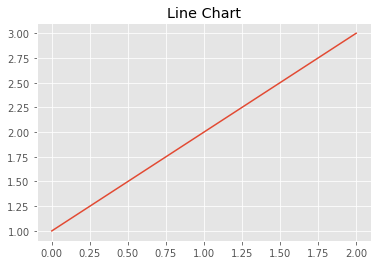

In [32]:
#데이터 시각화 - 그래프

import pandas as pd
import matplotlib.pyplot as plt

ax = pd.Series([1,2,3]).plot()
ax.set_title('Line Chart')
plt.show()

In [34]:
plt.style.use('ggplot') #스타일 변경

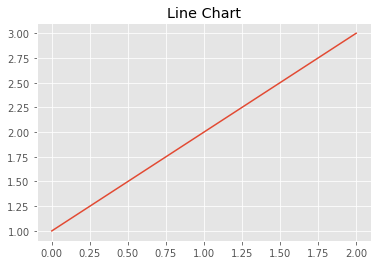

In [37]:
#Series에서 플롯하기
ser = pd.Series([1,2,3])
ax = ser.plot()
ax.set_title('Line Chart')
plt.show()

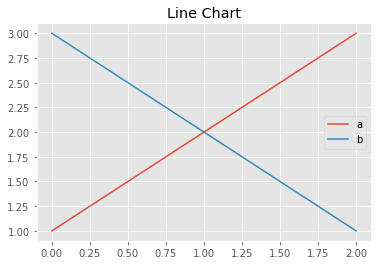

In [38]:
#Dataframe에서 플롯하기

df = pd.DataFrame({'a' : [1,2,3], 'b' : [3,2,1]})
ax = df.plot()
ax.set_title('Line Chart')
plt.show()

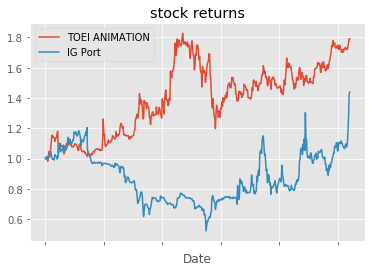

In [39]:
#꺾은선 그래프 plot()

import os
anime_stock_returns_csv = './anime/anime_stock_returns.csv'
anime_stock_returns_df = pd.read_csv(anime_stock_returns_csv, index_col = 0)
ax = anime_stock_returns_df.plot()
ax.set_title('stock returns')
plt.show()

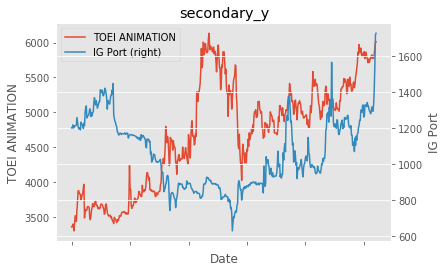

In [45]:
#Y축 범위가 다른 경우 secondary_y 에 두번째 축 열 이름을 리스트로 지정한다.

anime_stock_price = './anime/anime_stock_price.csv'
anime_stock_price_df = pd.read_csv(anime_stock_price_csv, index_col=0)
ax = anime_stock_price_df.plot(secondary_y=['IG Port'])
ax.set_title('secondary_y')
ax.set_ylabel('TOEI ANIMATION')
ax.right_ax.set_ylabel('IG Port')
plt.show()

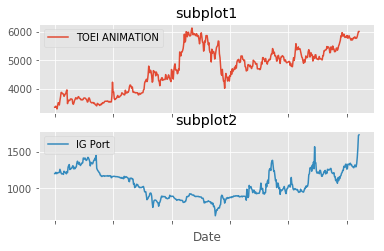

In [46]:
#복수의 그림에 분할 subplots=True

ax1, ax2 = anime_stock_price_df.plot(subplots=True)
ax1.set_title('subplot1')
ax2.set_title('subplot2')
plt.show()

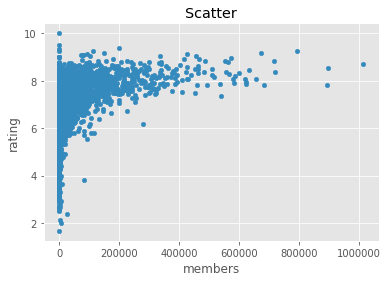

In [48]:
#산포도 그래프 plot.scatter(x=  , y= )

anime_master_csv = './anime/anime_master.csv'
anime_master_df = pd.read_csv(anime_master_csv)
ax = anime_master_df.plot.scatter(x='members', y='rating')
ax.set_title('Scatter')
plt.show()

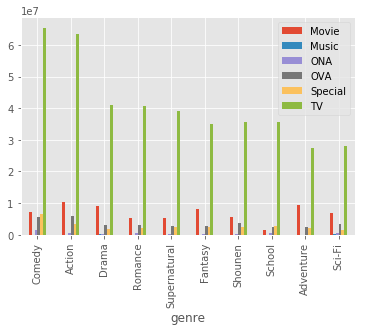

In [57]:
#막대 그래프 작성 plot.bar()

anime_genre_top10_pivoted_csv = './anime/anime_genre_top10_pivoted.csv'
anime_genre_top10_pivoted_df = pd.read_csv(anime_genre_top10_pivoted_csv, index_col=0)
ax = anime_genre_top10_pivoted_df.plot.bar()
plt.show()

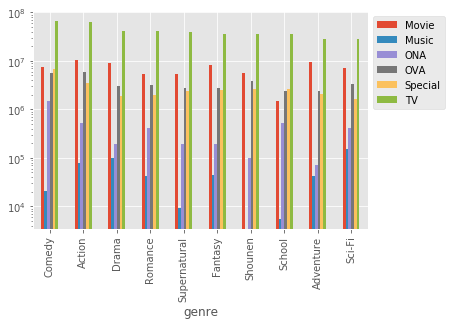

In [52]:
#로그 축으로 변경

ax = anime_genre_top10_pivoted_csv_df.plot.bar(logy=True)
ax.legend(bbox_to_anchor=(1,1))
plt.show()

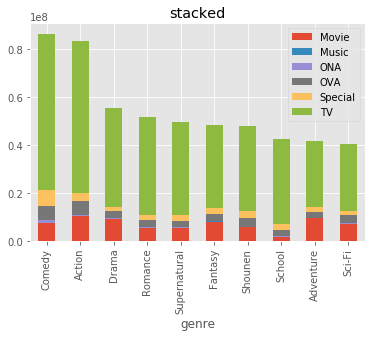

In [53]:
#누적 막대그래프 option에 stacked=True

ax = anime_genre_top10_pivoted_csv_df.plot.bar(stacked=True)
ax.set_title('stacked')
plt.show()

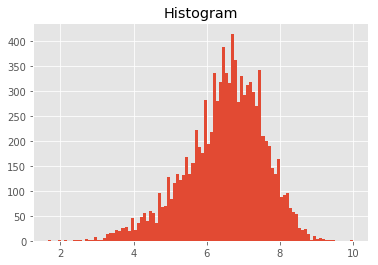

In [55]:
#히스토그램 작성 hist()

ax = anime_master_df['rating'].hist(bins=100)
ax.set_title('Histogram')
plt.show()

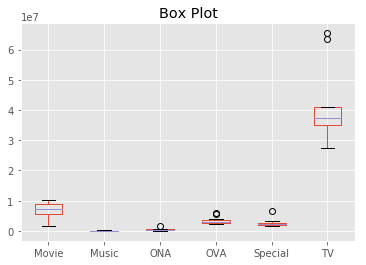

In [58]:
#상자수염 plot.box()

ax = anime_genre_top10_pivoted_df.plot.box()
ax.set_title('Box Plot')
plt.show()

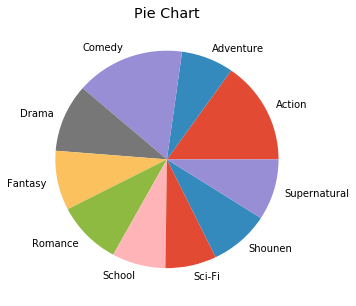

In [60]:
#원 그래프 plot.pie()

anime_genre_top10_csv = './anime/anime_genre_top10.csv'
anime_genre_top10_df = pd.read_csv(anime_genre_top10_csv)
ax = anime_genre_top10_df.groupby('genre').sum()['members'].plot.pie(figsize=(5,5))
ax.set_title('Pie Chart')
ax.set_ylabel('') # Y축 레이블 삭제
plt.show()